In [2]:
import sqlite3
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
con = sqlite3.connect('/content/drive/MyDrive/datasets/Chinook_Sqlite.sqlite')
cur = con.cursor()
try:
    cur.execute("""
    SELECT name
    FROM Artist;
                """)
    fa = cur.fetchall()
    columns = [i[0] for i in cur.description]
    data = pd.DataFrame(fa, columns=columns)
    display(data)
except sqlite3.DatabaseError as error:
    print("Ошибка:", error)
finally:
    cur.close()
    con.close()


,Name
0,AC/DC
1,Accept
2,Aerosmith
3,Alanis Morissette
4,Alice In Chains
...,...
270,"Mela Tenenbaum, Pro Musica Prague & Richard Kapp"
271,Emerson String Quartet
272,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
273,Nash Ensemble


In [10]:
with open("/content/drive/MyDrive/datasets/AnnaKarenina_.txt", "r",  encoding="windows-1251") as file:
    text = file.read(500)
    print(text)

Лев Николаевич Толстой

АННА КАРЕНИНА

Мне отмщение, и аз воздам




ЧАСТЬ ПЕРВАЯ


I

Все счастливые семьи похожи друг на друга, каждая несчастливая семья несчастлива по-своему.

Все смешалось в доме Облонских. Жена узнала, что муж был в связи с бывшею в их доме француженкою-гувернанткой, и объявила мужу, что не может жить с ним в одном доме. Положение это продолжалось уже третий день и мучительно чувствовалось и самими супругами, и всеми членами семьи, и домочадцами. Все члены семьи и домочадц


Датасет: -

 Создайте матрицу 3x3 со значениями от 0 до 8

In [9]:
import numpy as np
M = np.arange(9).reshape(3, 3)
print(M)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


Датасет: -
 Необходимо найти все целые числа от 1 до 400 000, для которых sin от этого числа будет иметь не менее 9 одинаковых цифр (например, sin(139198)=0.30763333543133703; sin(139198)=0.30763333543133703 т.е. имеет 9 троек). Ответ представляет собой список пар (целое число, значение синуса для него), для которых значение синуса удовлетворяет условию. Решение этой задачи распараллелить, используя multiprocessing Pool. Сравнить продолжительность последовательного и параллельного решения задачи.

In [11]:
import math
from multiprocessing import Pool

def check_sin(num):
    sin_num = math.sin(num)
    sin_str = str(sin_num)
    for i in range(10):
        if str(i)*9 in sin_str:
            return (num, sin_num)
    return None

In [12]:
nums = range(1, 400001)

In [13]:
%%time
# Последовательное решение
res_seq = []
for num in nums:
    res = check_sin(num)
    if res:
        res_seq.append(res)
print("Последовательное решение:", res_seq)

Последовательное решение: [(51819, 0.999999999696513), (52174, -0.9999999999848337), (52529, 0.9999999993644724), (155812, 0.9999999990422608), (156167, -0.9999999999072229), (156522, 0.9999999998635031), (260160, -0.9999999994636807), (260515, 0.9999999999966023), (260870, -0.9999999996208419), (364508, 0.99999999976377), (364863, -0.999999999964651), (365218, 0.99999999925685)]
CPU times: user 1.93 s, sys: 0 ns, total: 1.93 s
Wall time: 1.97 s


In [14]:
%%time
# Параллельное решение
with Pool(processes=4) as pool:
    res_par = pool.map(check_sin, nums)
    res_par = [res for res in res_par if res]
print("Параллельное решение:", res_par)

Параллельное решение: [(51819, 0.999999999696513), (52174, -0.9999999999848337), (52529, 0.9999999993644724), (155812, 0.9999999990422608), (156167, -0.9999999999072229), (156522, 0.9999999998635031), (260160, -0.9999999994636807), (260515, 0.9999999999966023), (260870, -0.9999999996208419), (364508, 0.99999999976377), (364863, -0.999999999964651), (365218, 0.99999999925685)]
CPU times: user 155 ms, sys: 25.4 ms, total: 180 ms
Wall time: 1.43 s


Датасет: addres-book-q.xml
 По данным из файла addres-book-q.xml сформировать словарь, в котором по должности можно получить список людей с данной должностью и для каждого человека по соответствующему ключу можно получить имя, компанию и список всех доступных телефонов. Сохранить данную структуру данных в файл формата json и прочитать ее, показав идентичность структуры данных после сохранения/загрузки.


In [157]:
import xml.etree.ElementTree as ET
import json

# Парсинг XML-файла
tree = ET.parse('/content/drive/MyDrive/datasets/addres-book-q.xml')
root = tree.getroot()

# Словарь для хранения данных
data = {}
data2 = {}

# Обработка каждого элемента <address> в XML-файле
for address_elem in root.findall('.//address'):
    address_id = address_elem.get('id')
    name = address_elem.find('name').text
    position = address_elem.find('position').text
    company = address_elem.find('company').text
    phones = [phone_elem.text for phone_elem in address_elem.findall('phones/phone')]

    # Добавление данных в словарь
    data[address_id] = {
        'name': name,
        'position': position,
        'company': company,
        'phones': phones
    }

    data2.setdefault(position, []).append(name)

# Сохранение словаря в файл JSON
with open('address-book.json', 'w', encoding='utf-8') as json_file:
    json.dump(data, json_file, ensure_ascii=False)

# Чтение данных из файла JSON
with open('address-book.json', 'r', encoding='utf-8') as json_file:
    loaded_data = json.load(json_file)

# Проверка идентичности структуры данных
print(data == loaded_data)

True


In [158]:
data

{'1': {'name': 'Aicha Barki',
  'position': 'Presidente',
  'company': "Association Algerienne d'Alphabetisation Iqraa",
  'phones': ['+ (213) 6150 4015', '+ (213) 2173 5247']},
 '2': {'name': 'Francisco Domingos',
  'position': 'Directeur General',
  'company': 'Institut National de Education des Adultes',
  'phones': ['+ (244-2) 325 023', '+ (244-2) 325 023']},
 '3': {'name': 'Maria Luisa',
  'position': 'Directrice Nationale',
  'company': 'Institut National de Education des Adultes',
  'phones': ['+ (244) 4232 2836']},
 '4': {'name': 'Abraao Chanda',
  'position': 'Chef',
  'company': 'Institut National de Education des Adultes',
  'phones': ['+ (244-2) 325 023', '+ (244-2) 325 023']},
 '5': {'name': 'Beatriz Busaniche',
  'position': 'Executive Director',
  'company': 'Universidad de Buenos Aires',
  'phones': ['+ (54-11) 4784 1159']},
 '6': {'name': 'Francesca Beddie',
  'position': 'Executive Director',
  'company': 'Adult Learning Australia',
  'phones': ['+ (61-2) 6274 9500', 

In [159]:
loaded_data

{'1': {'name': 'Aicha Barki',
  'position': 'Presidente',
  'company': "Association Algerienne d'Alphabetisation Iqraa",
  'phones': ['+ (213) 6150 4015', '+ (213) 2173 5247']},
 '2': {'name': 'Francisco Domingos',
  'position': 'Directeur General',
  'company': 'Institut National de Education des Adultes',
  'phones': ['+ (244-2) 325 023', '+ (244-2) 325 023']},
 '3': {'name': 'Maria Luisa',
  'position': 'Directrice Nationale',
  'company': 'Institut National de Education des Adultes',
  'phones': ['+ (244) 4232 2836']},
 '4': {'name': 'Abraao Chanda',
  'position': 'Chef',
  'company': 'Institut National de Education des Adultes',
  'phones': ['+ (244-2) 325 023', '+ (244-2) 325 023']},
 '5': {'name': 'Beatriz Busaniche',
  'position': 'Executive Director',
  'company': 'Universidad de Buenos Aires',
  'phones': ['+ (54-11) 4784 1159']},
 '6': {'name': 'Francesca Beddie',
  'position': 'Executive Director',
  'company': 'Adult Learning Australia',
  'phones': ['+ (61-2) 6274 9500', 

Датасет: all_k.zip
 Подсчитать, сколько раз в текстовых файлах, лежащих в all_k.zip, встречаются предложения трех видов: вопросительные (в окончании имеют вопросительный знак), побудительные (в окончании имеют восклицательный знак и не имеют вопросительного) и повествовательные (в окончании имеют точку или троеточие, при этом нужно исключить учет точек, встречающихся в сокращениях, таких как ""т.к."").
Выполнить задание с использованием Dask (корректным!), распараллелив процесс обработки данных (использование Dask должно приводить к истинной параллельной обработке данных).


In [19]:
import dask.bag as db
import re

In [154]:
regex_average = r'([^\d]\.\s*[А-ЯЁ])|(?:\.(?:\Z|\n))'
regex_question = r'(\?\s*[А-ЯЁ])|(?:\?(?:\Z|))'
regex_exclamation  = r'(!\s*[А-ЯЁ])|(?:!(?:\Z|))'
texts = db.read_text('/content/drive/MyDrive/datasets/all_k/*', encoding='windows-1251')
print("Количество повествовательных предложений:", texts.map(lambda text: len(re.findall(regex_average, text))).fold(lambda x, y: x + y).compute())
print("Количество вопросительных предложений:", texts.map(lambda text: len(re.findall(regex_question, text))).fold(lambda x, y: x + y).compute())
print("Количество побудительных предложений:",texts.map(lambda text: len(re.findall(regex_exclamation, text))).fold(lambda x, y: x + y).compute())

Количество повествовательных предложений: 3497062
Количество вопросительных предложений: 459416
Количество побудительных предложений: 261296


Датасет: wine.csv.zip
 1. Как часто каждая страна появляется в датасете wine.csv.zip? Создайте pd.Series сопоставляющую страны количеству отзывов о винах из этой страны.

2. Определите среднюю оценку рейтинга для каждого ревьюера (используйте 'taster_name' ,'points')


In [22]:
wine = pd.read_csv('/content/drive/MyDrive/datasets/winemag-data-130k-v2.csv')

wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


1. Как часто каждая страна появляется в датасете wine.csv.zip? Создайте pd.Series сопоставляющую страны количеству отзывов о винах из этой страны.

In [24]:
reviews_by_country = wine.groupby('country')['country'].count() # определение частоты появления каждой страны в датасете

reviews_by_country_series = pd.Series(reviews_by_country, index = reviews_by_country.index) # создание pd.Series сопоставляющей страны количеству отзывов о винах из этой страны

print("Количество отзывов о винах из каждой страны:")
print(reviews_by_country_series)

Количество отзывов о винах из каждой страны:
country
Argentina                  3800
Armenia                       2
Australia                  2329
Austria                    3345
Bosnia and Herzegovina        2
Brazil                       52
Bulgaria                    141
Canada                      257
Chile                      4472
China                         1
Croatia                      73
Cyprus                       11
Czech Republic               12
Egypt                         1
England                      74
France                    22093
Georgia                      86
Germany                    2165
Greece                      466
Hungary                     146
India                         9
Israel                      505
Italy                     19540
Lebanon                      35
Luxembourg                    6
Macedonia                    12
Mexico                       70
Moldova                      59
Morocco                      28
New Zealand        

2. Определите среднюю оценку рейтинга для каждого ревьюера (используйте 'taster_name' ,'points')

In [25]:
avg_points_by_taster = wine.groupby('taster_name')['points'].mean()

print("Средняя оценка рейтинга для каждого ревьюера:")
print(avg_points_by_taster)

Средняя оценка рейтинга для каждого ревьюера:
taster_name
Alexander Peartree    85.855422
Anna Lee C. Iijima    88.415629
Anne Krebiehl MW      90.562551
Carrie Dykes          86.395683
Christina Pickard     87.833333
Fiona Adams           86.888889
Jeff Jenssen          88.319756
Jim Gordon            88.626287
Joe Czerwinski        88.536235
Kerin O’Keefe         88.867947
Lauren Buzzeo         87.739510
Matt Kettmann         90.008686
Michael Schachner     86.907493
Mike DeSimone         89.101167
Paul Gregutt          89.082564
Roger Voss            88.708003
Sean P. Sullivan      88.755739
Susan Kostrzewa       86.609217
Virginie Boone        89.213379
Name: points, dtype: float64


Датасет: minutes_n_ingredients_full.hdf5
 Считайте датасет recipe из файла minutes_n_ingredients_full.hdf5 в виде dask.array. Укажите аргумент chunks=(100_000, 3) при создании массива. Выведите на экран основную информацию о массиве и вычислите среднее значение по каждому столбцу, кроме первого.


In [27]:
import os
import numpy as np
import h5py
import dask.array as da

**Считайте датасет recipe из файла minutes_n_ingredients_full.hdf5 в виде dask.array.**

In [128]:
path='/content/drive/MyDrive/datasets/minutes_n_ingredients_full.hdf5'

In [129]:
f = h5py.File(path)
print(list(f.keys()))
dset = f['recipe']

['recipe']


**Укажите аргумент chunks=(100_000, 3) при создании массива:**

In [130]:
recipe = da.from_array(dset, chunks=(100_000, 3))
print(recipe.shape)
recipe

(2231637, 3)


dask.array<array, shape=(2231637, 3), dtype=int64, chunksize=(100000, 3), chunktype=numpy.ndarray>

**Выведите на экран основную информацию о массиве:**

In [131]:
print('Основная информация:',recipe,'\n')
print('Количество строк и столбцов:',recipe.shape,'\n')
print('Тип элементов массива:',recipe.dtype,'\n')

Основная информация: dask.array<array, shape=(2231637, 3), dtype=int64, chunksize=(100000, 3), chunktype=numpy.ndarray> 

Количество строк и столбцов: (2231637, 3) 

Тип элементов массива: int64 



**Вычислите среднее значение по каждому столбцу, кроме первого**

In [135]:
mean = recipe[:, 1:].mean(axis=0)
mean

dask.array<mean_agg-aggregate, shape=(2,), dtype=float64, chunksize=(2,), chunktype=numpy.ndarray>

In [136]:
print('Второй столбец:',mean.compute()[0])
print('Третий столбец:',mean.compute()[1])

Второй столбец: 1004.2080517575215
Третий столбец: 5.419800800936711


Датасет: titanic.csv
 1. Сколько мужчин / женщин находилось на борту?

2. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?


 **1. Сколько мужчин / женщин находилось на борту?**

In [46]:
import pandas as pd

# Загрузка данных из CSV-файла в DataFrame
data = pd.read_csv("/content/drive/MyDrive/datasets/titanic.csv")

In [47]:
# Подсчет количества мужчин и женщин на борту
gender_counts = data['Sex'].value_counts()
male_count = gender_counts['male']
female_count = gender_counts['female']

print("Количество мужчин на борту:", male_count)
print("Количество женщин на борту:", female_count)

Количество мужчин на борту: 577
Количество женщин на борту: 314


**Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**

In [48]:
# Расчет долей выживших в обеих группах
survived_counts = data.groupby('Sex')['Survived'].sum()
total_counts = gender_counts

male_survived = survived_counts['male']
female_survived = survived_counts['female']

male_survival_rate = male_survived / male_count
female_survival_rate = female_survived / female_count

print("Доля выживших мужчин:", male_survival_rate)
print("Доля выживших женщин:", female_survival_rate)

Доля выживших мужчин: 0.18890814558058924
Доля выживших женщин: 0.7420382165605095


Ответ:
Да, правда. Женщины выживали чаще мужчин.

ЕСЛИ НУЖЕН ГРАФИК:

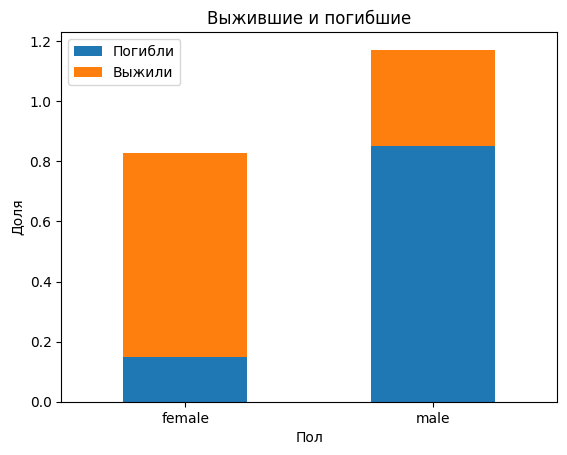

In [49]:
import matplotlib.pyplot as plt

survived_by_sex = data.groupby(['Sex', 'Survived'])['Survived'].count().unstack() # подсчет количества выживших и погибших по полу

survival_rate_by_sex = survived_by_sex / survived_by_sex.sum() # расчет долей выживших и погибших по полу

survival_rate_by_sex.plot(kind='bar', stacked=True)
plt.title('Выжившие и погибшие')
plt.xlabel('Пол')
plt.ylabel('Доля')
plt.xticks(rotation=0)
plt.legend(['Погибли', 'Выжили'])
plt.show()

Ответ:
Да, правда. Женщины выживали чаще мужчин.

Датасет: -
 Как найти общие значения между двумя массивами?


In [50]:
import numpy as np

# Пример двух массивов
array1 = np.array([1, 2, 3, 4, 5])
array2 = np.array([4, 5, 6, 7, 8])

# Нахождение общих значений
common_values = np.intersect1d(array1, array2)

print("Общие значения:", common_values)

Общие значения: [4 5]


ещё способ:

In [52]:
# Пример двух массивов
array1 = [1, 2, 3, 4, 5]
array2 = [4, 5, 6, 7, 8]

# Нахождение общих значений
common_values = list(set(array1) & set(array2))

print("Общие значения:", common_values)

Общие значения: [4, 5]


Датасет: -
 Создать двумерный массив 30 на 4, содержащий случайные целые числа от 0 до 100. Интерпретируя массив как 30 векторов из 4х компонент, вернуть массив 5 на 4, состоящий из векторов с наибольшей длиной (евклидовой нормой).Решить задачу средствами numpy и/или pandas. Не использовать циклы и конструкции стандартного Python там, где можно использовать возможности данных библиотек.


In [51]:
import numpy as np

# создаем двумерный массив 30 на 4 случайных целых чисел от 0 до 100
arr = np.random.randint(0, 101, size=(30, 4))

# вычисляем длины векторов
lengths = np.linalg.norm(arr, axis=1)

# находим индексы векторов с наибольшей длиной
max_indices = np.argsort(lengths)[-5:]

# выбираем соответствующие векторы
result = arr[max_indices]

print(result)


[[ 69  90  35  77]
 [ 75  45  76  99]
 [ 57  73 100  79]
 [ 96  92  45  72]
 [ 63  90  88  72]]


Датасет: titanic.csv
 1. Верно ли, что средний возраст выживших людей выше, чем у не выживших пассажиров?

2. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?


In [55]:
import pandas as pd

# Загрузка данных из CSV-файла в DataFrame
data = pd.read_csv("/content/drive/MyDrive/datasets/titanic.csv")

# 1. Средний возраст выживших и не выживших
mean_age_survived = data.loc[data['Survived'] == 1, 'Age'].mean()
mean_age_not_survived = data.loc[data['Survived'] == 0, 'Age'].mean()

print("Средний возраст выживших:", mean_age_survived)
print("Средний возраст не выживших:", mean_age_not_survived)

Средний возраст выживших: 28.343689655172415
Средний возраст не выживших: 30.62617924528302


In [54]:
# 2. Доли выживших мужчин и женщин
survived_counts = data.groupby('Sex')['Survived'].sum()
total_counts = data['Sex'].value_counts()

male_survived = survived_counts['male']
female_survived = survived_counts['female']

male_total = total_counts['male']
female_total = total_counts['female']

male_survival_rate = male_survived / male_total
female_survival_rate = female_survived / female_total

print("Доля выживших мужчин:", male_survival_rate)
print("Доля выживших женщин:", female_survival_rate)

Доля выживших мужчин: 0.18890814558058924
Доля выживших женщин: 0.7420382165605095


Неверно, средний возраст выживших ниже, чем у невыживших

Датасет: titanic.csv
 1. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?

2. Найдите самое популярное имя среди пассажиров Титаника мужского пола.


In [27]:
import pandas as pd

# Загрузка данных из CSV-файла в DataFrame
data = pd.read_csv("/content/drive/MyDrive/datasets/titanic.csv")

# Подсчет количества выживших мужчин и женщин
survived_counts = data.groupby('Sex')['Survived'].sum()
total_counts = data['Sex'].value_counts()

male_survived = survived_counts['male']
female_survived = survived_counts['female']

male_total = total_counts['male']
female_total = total_counts['female']

# Проверка, выживали ли женщины чаще мужчин
female_survival_rate = female_survived / female_total
male_survival_rate = male_survived / male_total

# Доли выживших в обеих группах
print("Доля выживших мужчин:", male_survival_rate)
print("Доля выживших женщин:", female_survival_rate)

if female_survival_rate > male_survival_rate:
    print("Ответ: Женщины выживали чаще мужчин")
else:
    print("Ответ: Мужчины выживали чаще женщин")

Доля выживших мужчин: 0.18890814558058924
Доля выживших женщин: 0.7420382165605095
Ответ: Женщины выживали чаще мужчин


In [39]:
# Нахождение самого популярного имени среди пассажиров мужского пола
# сортировка по столбцу Sex, извлечение имён из столбца Name строчными методами pandas и получение
# наиболее часто встречающегося значения через функцию value_counts
print("Самое популярное имя пасажира:", data[data['Sex'] == 'male']['Name'].str.split(',').str[1].str.split(' ').str[2].value_counts().index[0])

Самое популярное имя пасажира: William


Датасет: minutes_n_ingredients_full.hdf5
 Считайте датасет recipe из файла minutes_n_ingredients_full.hdf5 в виде dask.array. Укажите аргумент chunks=(100_000, 3) при создании массива. Выведите на экран основную информацию о массиве и выберите рецепты, время выполнения которых меньше медианного значения.


In [60]:
import os
import numpy as np
import h5py
import dask.array as da

**Считайте датасет recipe из файла minutes_n_ingredients_full.hdf5 в виде dask.array.**

In [61]:
path='/content/drive/MyDrive/datasets/minutes_n_ingredients_full.hdf5'

In [62]:
f = h5py.File(path)
print(list(f.keys()))
dset = f['recipe']

['recipe']


**Укажите аргумент chunks=(100_000, 3) при создании массива:**

In [63]:
recipe = da.from_array(dset, chunks=(100_000, 3))
print(recipe.shape)
recipe

(2231637, 3)


dask.array<array, shape=(2231637, 3), dtype=int64, chunksize=(100000, 3), chunktype=numpy.ndarray>

**Выведите на экран основную информацию о массиве:**

In [64]:
print('Основная информация:',recipe,'\n')
print('Количество строк и столбцов:',recipe.shape,'\n')
print('Тип элементов массива:',recipe.dtype,'\n')

Основная информация: dask.array<array, shape=(2231637, 3), dtype=int64, chunksize=(100000, 3), chunktype=numpy.ndarray> 

Количество строк и столбцов: (2231637, 3) 

Тип элементов массива: int64 



**Выберите рецепты, время выполнения которых меньше медианного значения:**

In [65]:
median = da.median(recipe[:,1],axis = 0).compute()
print('Медианное значение времени выполнения:',median)

Медианное значение времени выполнения: 32.0


In [66]:
recipe[(recipe[:,1] < median)].compute()

array([[1089012,      23,       5],
       [1428572,       0,       5],
       [1400250,      24,       1],
       ...,
       [1029131,      19,       4],
       [1700703,       1,       1],
       [ 713836,       0,       9]])

Датасет: accounts.*.csv В accounts.*.csv найти id, для которого в столбце amount встречается наибольшее количество значений, кратных 5 и не кратных 10.

In [76]:
import pandas as pd
import glob

# Список файлов accounts.*.csv
file_list = glob.glob("/content/drive/MyDrive/datasets/accounts/accounts.*.csv")

# Создание пустого DataFrame
df = pd.DataFrame()

# Загрузка данных из всех файлов в DataFrame
for file in file_list:
    df_temp = pd.read_csv(file)
    df = df.append(df_temp)

# Фильтрация значений в столбце "amount"
filtered_data = df[(df['amount'] % 5 == 0) & (df['amount'] % 10 != 0)]

# Подсчет количества значений по id
id_counts = filtered_data['id'].value_counts()
display(id_counts)
# Нахождение id с наибольшим количеством значений
max_count_id = id_counts.idxmax()

print("ID с наибольшим количеством значений, кратных 5 и не кратных 10:", max_count_id)


<ipython-input-76-ccdbddb848de>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)
<ipython-input-76-ccdbddb848de>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)
<ipython-input-76-ccdbddb848de>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


137    4883
243    4857
290    3183
228    3158
173    3095
       ... 
169       3
428       3
238       3
334       2
413       1
Name: id, Length: 496, dtype: int64

ID с наибольшим количеством значений, кратных 5 и не кратных 10: 137


Датасет: titanic.csv
 1. Каковы медиана и стандартное отклонение платежей (Fare)? Округлите до 2 десятичных знаков.

2. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?


In [43]:
import pandas as pd

# Загрузка данных из файла
data = pd.read_csv("/content/drive/MyDrive/datasets/titanic.csv")

# Медиана и стандартное отклонение платежей (Fare)
fare_median = data["Fare"].median()
fare_std = data["Fare"].std()

# Округление до 2 десятичных знаков
fare_median = round(fare_median, 2)
fare_std = round(fare_std, 2)

# Вычисление доли выживших для людей моложе 30 лет
survived_younger_30 = data[data["Age"] < 30]["Survived"].mean()

# Вычисление доли выживших для людей старше 60 лет
survived_older_60 = data[data["Age"] > 60]["Survived"].mean()

# Проверка условия
younger_30_survived_more = survived_younger_30 > survived_older_60

# Вывод результатов
print("Медиана платежей (Fare):", fare_median)
print("Стандартное отклонение платежей (Fare):", fare_std)
print("Доля выживших для людей моложе 30 лет:", survived_younger_30)
print("Доля выживших для людей старше 60 лет:", survived_older_60)
print("Люди моложе 30 лет выживали чаще, чем люди старше 60 лет:", younger_30_survived_more)


Медиана платежей (Fare): 14.45
Стандартное отклонение платежей (Fare): 49.69
Доля выживших для людей моложе 30 лет: 0.40625
Доля выживших для людей старше 60 лет: 0.22727272727272727
Люди моложе 30 лет выживали чаще, чем люди старше 60 лет: True


Датасет: all_k.zip
 Подсчитать, сколько раз встречается каждая из заглавных русских букв в текстовых файлах, лежащих в all_k.zip.
Выполнить задание с использованием Dask (корректным!), распараллелив процесс обработки данных (использование Dask должно приводить к истинной параллельной обработке данных).


In [83]:
regex = r'[А-ЯЁ]'
texts = db.read_text('/content/drive/MyDrive/datasets/all_k/*', encoding='windows-1251')
texts = texts.map(lambda text: re.findall(regex, text)).flatten().frequencies()
print(sorted(texts.compute(schedule = 'processes'), key=lambda elem: elem[0]))

[('Ё', 60), ('А', 271030), ('Б', 250252), ('В', 466965), ('Г', 192381), ('Д', 479733), ('Е', 162606), ('Ж', 25925), ('З', 116175), ('И', 253041), ('Й', 13747), ('К', 442819), ('Л', 187693), ('М', 388300), ('Н', 566581), ('О', 599173), ('П', 455438), ('Р', 210449), ('С', 430379), ('Т', 353618), ('У', 128438), ('Ф', 82202), ('Х', 118962), ('Ц', 11270), ('Ч', 132623), ('Ш', 47125), ('Щ', 2292), ('Ъ', 106), ('Ы', 5669), ('Ь', 6025), ('Э', 225757), ('Ю', 8884), ('Я', 253267)]


Датасет: wine.csv.zip
 1. Найти медиану поля points в датасете wine.csv.zip

2. Определите среднюю оценку рейтинга для каждого ревьюера (используйте 'taster_name' ,'points')


In [71]:
# Загрузка данных из CSV-файла в DataFrame
data = pd.read_csv("/content/drive/MyDrive/datasets/winemag-data-130k-v2.csv")

# Медиана поля "points"
points_median = data['points'].median()

print("Медиана поля 'points':", points_median)

# Средняя оценка рейтинга для каждого рецензента
mean_ratings = data.groupby('taster_name')['points'].mean()

print("Средняя оценка рейтинга для каждого рецензента:")
print(mean_ratings)

Медиана поля 'points': 88.0
Средняя оценка рейтинга для каждого рецензента:
taster_name
Alexander Peartree    85.855422
Anna Lee C. Iijima    88.415629
Anne Krebiehl MW      90.562551
Carrie Dykes          86.395683
Christina Pickard     87.833333
Fiona Adams           86.888889
Jeff Jenssen          88.319756
Jim Gordon            88.626287
Joe Czerwinski        88.536235
Kerin O’Keefe         88.867947
Lauren Buzzeo         87.739510
Matt Kettmann         90.008686
Michael Schachner     86.907493
Mike DeSimone         89.101167
Paul Gregutt          89.082564
Roger Voss            88.708003
Sean P. Sullivan      88.755739
Susan Kostrzewa       86.609217
Virginie Boone        89.213379
Name: points, dtype: float64


Датасет: reviews_full_mini
 В файлах папки  reviews_full_mini находятся файлы, содержащие информацию об отзывах к рецептам в формате JSON Lines. Отзывы разделены на файлы в зависимости от оценки (например, в файле reviews_1.json находятся отзывы с оценкой 1). Считайте файлы из этого архива в виде dask.bag. Преобразуйте текстовое содержимое файлов в объекты python (с помощью модуля json). Выведите на экран первые 5 элементов полученного bag. Модифицируйте функцию разбора JSON таким образом, чтобы в каждый словарь c информацией об отзыве добавить ключ rating. Значение получите на основе названия файла (см. аргумент include_path), использовав для этого регулярное выражение.Выполните препроцессинг отзывов:
    * привести строки к нижнему регистру
    * обрезать пробельные символы в начале и конце строки
    * удалите все символы, кроме английских букв и пробелов


In [10]:
import dask.bag as db
import re
import json

In [84]:
def func(json_str: tuple):
    # получение рейтига из названия файла через регулярное выражение
    rating = int(re.search(r'reviews_(\d).json', json_str[1]).group(1))
    review = json.loads(json_str[0])
    review['rating'] = rating
    review['review'] = re.sub(r"[^a-zA-Z\s]", "", review['review'].lower().strip())
    # получение месяца из даты
    review['month'] = int(review['date'][5:7])
    return review

In [85]:
# открытие файла и вывод первых 5 элементов Bag
data = db.read_text('/content/drive/MyDrive/datasets/reviews_full_mini/reviews_*.json', include_path=True).map(func)
print(data.take(5))

({'user_id': 452355, 'recipe_id': 292657, 'date': '2016-05-08', 'review': 'wow this is the best i have never been able to make homemade enchiladas that taste like the mexican restaurants i made this last night for my family and they said they will never have enchiladas at the mexican restaurants again thanks for sharing', 'rating': 0, 'month': 5}, {'user_id': 329304, 'recipe_id': 433404, 'date': '2006-06-14', 'review': 'this was good but the dressing needed something and i found it to be a little too sweet next time i will experiment with some garlic and herbs and reduce the sugar slightly thanks for sharing kcdlongkitten', 'rating': 0, 'month': 6}, {'user_id': 227932, 'recipe_id': 2008187, 'date': '1985-11-19', 'review': 'very goodit was a hit for my family i used  cloves of garlic and had  lb beef and  johnsonville sausage lb hot and   lb honey garlic which i wanted to use that was a perfect combo for us the sausage gave it nice flavor no guestion  i will be making this often', 'rati

Датасет: accounts.*.csv
 В accounts.*.csv найти id, для которого в столбце amount встречается наибольшее количество значений, кратных трем.

In [86]:
import pandas as pd
import glob

# Список файлов CSV, соответствующих шаблону "accounts.*.csv"
file_pattern = "/content/drive/MyDrive/datasets/accounts/accounts.*.csv"

# Чтение файлов CSV в DataFrame с использованием glob
dataframes = [pd.read_csv(file) for file in glob.glob(file_pattern)]

# Объединение DataFrame'ов в один DataFrame
merged_df = pd.concat(dataframes)

# Фильтрация значений, кратных трем, в столбце "amount"
filtered_df = merged_df[merged_df['amount'] % 3 == 0]

# Подсчет количества значений, кратных трем, для каждого id
count_by_id = filtered_df['id'].value_counts()

# Получение id с наибольшим количеством значений, кратных трем
max_count_id = count_by_id.idxmax()

print("ID с наибольшим количеством значений, кратных трем:", max_count_id)

ID с наибольшим количеством значений, кратных трем: 137


Датасет: -
 Создайте единичную матрицу 3x3


In [76]:
import numpy as np

# Создание единичной матрицы 3x3
identity_matrix = np.eye(3)

print(identity_matrix)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Датасет: -
 Создайте матрицу шахматной доски 8x8, используя функцию tile


In [77]:
import numpy as np

# Определение шаблона одной клетки шахматной доски
cell_template = np.array([[0, 1], [1, 0]])

# Повторение шаблона для создания матрицы шахматной доски
chessboard = np.tile(cell_template, (4, 4))

print(chessboard)

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


Датасет: wine.csv.zip
 1. Подсчитайте количество отзывов, написанных каждым человеком ('taster_name') (используйте groupby).Определите человека, который написал наибольшее количество отзывов в датасете wine.csv.zip.

2. Определите минимальные и максимальные цены на каждый сорт вина ('variety')? Определите название и самый дорогой вид вина.


In [88]:
df = pd.read_csv('/content/drive/MyDrive/datasets/winemag-data-130k-v2.csv')

# Подсчет количества отзывов по каждому человеку ('taster_name')
review_count = df['taster_name'].value_counts()

# Определение человека с наибольшим количеством отзывов
max_reviews_person = review_count.idxmax()

print("Человек с наибольшим количеством отзывов:", max_reviews_person)

# Определение минимальных и максимальных цен на каждый сорт вина ('variety')
price_stats = df.groupby('variety')['price'].agg(['min', 'max'])
print("Минимальные и максимальные цены на каждый сорт вина:")
print(price_stats)

# Определение названия и самого дорогого вида вина
max_price_wine = price_stats.loc[price_stats['max'].idxmax()]

print("Название самого дорогого вида вина:", max_price_wine.name)
print("Максимальная цена:", max_price_wine['max'])

Человек с наибольшим количеством отзывов: Roger Voss
Минимальные и максимальные цены на каждый сорт вина:
              min    max
variety                 
Abouriou     15.0   75.0
Agiorgitiko  10.0   66.0
Aglianico     6.0  180.0
Aidani       27.0   27.0
Airen         8.0   10.0
...           ...    ...
Zinfandel     5.0  100.0
Zlahtina     13.0   16.0
Zweigelt      9.0   70.0
Çalkarası    19.0   19.0
Žilavka      15.0   15.0

[707 rows x 2 columns]
Название самого дорогого вида вина: Bordeaux-style Red Blend
Максимальная цена: 3300.0


Датасет: Chinook_Sqlite.sqlite
 С помощью кода на Python с использованием sqlite3 и SQL решить задачу. Реализовать функции на Python:
1. Которая возвращает всех имеющихся артистов.
2. Которая по имени артиста возвращает все его альбомы с количеством треков в них.


1. Которая возвращает всех имеющихся артистов.

In [83]:
# Функция для получения всех имеющихся артистов
def get_all_artists():
  con = sqlite3.connect('/content/drive/MyDrive/datasets/Chinook_Sqlite.sqlite')
  cur = con.cursor()
  try:
      cur.execute("""
      SELECT name
      FROM Artist
                  """)
      fa = cur.fetchall()
      columns = [i[0] for i in cur.description]
      data = pd.DataFrame(fa, columns=columns)
  except sqlite3.DatabaseError as error:
      print("Ошибка:", error)
  finally:
      cur.close()
      con.close()

  return data

In [84]:
get_all_artists()

,Name
0,AC/DC
1,Accept
2,Aerosmith
3,Alanis Morissette
4,Alice In Chains
...,...
270,"Mela Tenenbaum, Pro Musica Prague & Richard Kapp"
271,Emerson String Quartet
272,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
273,Nash Ensemble


**2. Которая по имени артиста возвращает все его альбомы с количеством треков в них.**

In [108]:
# Функция для получения альбомов и количества треков по имени артиста
def get_albums_by_artist(artist_name):
  con = sqlite3.connect('/content/drive/MyDrive/datasets/Chinook_Sqlite.sqlite')
  cur = con.cursor()
  try:
      cur.execute(f"""
      SELECT Album.Title, COUNT(Track.TrackId) AS TrackCount
      FROM Artist
      INNER JOIN Album ON Artist.ArtistId = Album.ArtistId
      INNER JOIN Track ON Album.AlbumId = Track.AlbumId
      WHERE Artist.Name = '{artist_name}'
      GROUP BY Album.AlbumId
      ORDER BY Album.Title
                  """)
      fa = cur.fetchall()
      columns = [i[0] for i in cur.description]
      data = pd.DataFrame(fa, columns=columns)
  except sqlite3.DatabaseError as error:
      print("Ошибка:", error)
  finally:
      cur.close()
      con.close()
  return data

In [113]:
name = 'Accept'
get_albums_by_artist(name)

,Title,TrackCount
0,Balls to the Wall,1
1,Restless and Wild,3


Датасет: titanic.csv
 1. Сколько мужчин / женщин находилось на борту?

2. Найдите самое популярное имя среди пассажиров Титаника мужского пола.


In [79]:
import pandas as pd

# Чтение данных из файла CSV
data = pd.read_csv('/content/drive/MyDrive/datasets/titanic.csv')

# 1. Сколько мужчин / женщин находилось на борту?
gender_counts = data['Sex'].value_counts()
male_count = gender_counts['male']
female_count = gender_counts['female']

print("Количество мужчин на борту:", male_count)
print("Количество женщин на борту:", female_count)
print()

# Нахождение самого популярного имени среди пассажиров мужского пола
# сортировка по столбцу Sex, извлечение имён из столбца Name строчными методами pandas и получение
# наиболее часто встречающегося значения через функцию value_counts
print("Самое популярное имя пасажира:", data[data['Sex'] == 'male']['Name'].str.split(',').str[1].str.split(' ').str[2].value_counts().index[0])

Количество мужчин на борту: 577
Количество женщин на борту: 314

Самое популярное имя пасажира: William


Датасет: minutes_n_ingredients_full.hdf5
 Считайте датасет recipe из файла minutes_n_ingredients_full.hdf5 в виде dask.array. Укажите аргумент chunks=(100_000, 3) при создании массива. Выведите на экран основную информацию о массиве и создайте массив dask.array из 2 чисел, содержащих ваши предпочтения относительно времени выполнения рецепта и кол-ва ингредиентов. Найдите наиболее похожий (в смысле 𝐿1 ) рецепт из имеющихся в датасете.


In [115]:
import os
import numpy as np
import h5py
import dask.array as da

**Считайте датасет recipe из файла minutes_n_ingredients_full.hdf5 в виде dask.array.**

In [119]:
path='/content/drive/MyDrive/datasets/minutes_n_ingredients_full.hdf5'

In [120]:
f = h5py.File(path)
print(list(f.keys()))
dset = f['recipe']

['recipe']


**Укажите аргумент chunks=(100_000, 3) при создании массива:**

In [121]:
recipe = da.from_array(dset, chunks=(100_000, 3))
print(recipe.shape)
recipe

(2231637, 3)


dask.array<array, shape=(2231637, 3), dtype=int64, chunksize=(100000, 3), chunktype=numpy.ndarray>

**Выведите на экран основную информацию о массиве:**

In [122]:
print('Основная информация:',recipe,'\n')
print('Количество строк и столбцов:',recipe.shape,'\n')
print('Тип элементов массива:',recipe.dtype,'\n')

Основная информация: dask.array<array, shape=(2231637, 3), dtype=int64, chunksize=(100000, 3), chunktype=numpy.ndarray> 

Количество строк и столбцов: (2231637, 3) 

Тип элементов массива: int64 



Cоздайте массив dask.array из 2 чисел, содержащих ваши предпочтения относительно времени выполнения рецепта и кол-ва ингредиентов. Найдите наиболее похожий (в смысле 𝐿1 ) рецепт из имеющихся в датасете.

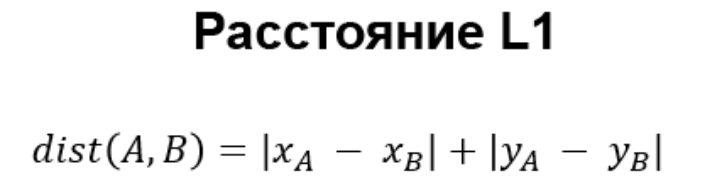

In [126]:
my_preferences = da.from_array([10, 5])

In [127]:
times = recipe[:, 1]
ingredients = recipe[:, 2]
dist = da.abs(times - my_preferences[0]) + da.abs(ingredients - my_preferences[1]) # По формуле вычисляем dist
index_1 = da.argmin(dist) # Находим индекс рецепта с наименьшей суммой разностей, функция argmin() возвращает индекс минимального значения вдоль указанной оси.
recipe2 = recipe[index_1, :] # Получаем данные о найденном рецепте
print(f'Наиболее похожий рецепт: {recipe2.compute()}')


Наиболее похожий рецепт: [2168955      10       5]


Датасет: wine.csv.zip
 1. Подсчитайте, сколько раз "tropical" и "fruity" встречается в описаниях вина (description) в датасете wine.csv.zip. (Необходимо учесть регистр)

2. Определите среднюю оценку рейтинга для каждого ревьюера (используйте 'taster_name' ,'points')

In [90]:
import pandas as pd

# Загрузка данных из файла
data = pd.read_csv("/content/drive/MyDrive/datasets/winemag-data-130k-v2.csv")

# Подсчет количества раз, когда "tropical" и "fruity" встречаются в описаниях вина
count_tropical = data[data["description"].str.contains("tropical", case=True)]["description"].count()
count_fruity = data[data["description"].str.contains("fruity", case=True)]["description"].count()

# Вывод результатов
print("Количество раз, когда 'tropical' встречается в описаниях вина:", count_tropical)
print("Количество раз, когда 'fruity' встречается в описаниях вина:", count_fruity)

Количество раз, когда 'tropical' встречается в описаниях вина: 3607
Количество раз, когда 'fruity' встречается в описаниях вина: 9090


In [91]:
# Определение средней оценки рейтинга для каждого ревьюера
avg_rating_by_reviewer = data.groupby("taster_name")["points"].mean()

# Вывод результатов
print("Средняя оценка рейтинга для каждого ревьюера:")
print(avg_rating_by_reviewer)

Средняя оценка рейтинга для каждого ревьюера:
taster_name
Alexander Peartree    85.855422
Anna Lee C. Iijima    88.415629
Anne Krebiehl MW      90.562551
Carrie Dykes          86.395683
Christina Pickard     87.833333
Fiona Adams           86.888889
Jeff Jenssen          88.319756
Jim Gordon            88.626287
Joe Czerwinski        88.536235
Kerin O’Keefe         88.867947
Lauren Buzzeo         87.739510
Matt Kettmann         90.008686
Michael Schachner     86.907493
Mike DeSimone         89.101167
Paul Gregutt          89.082564
Roger Voss            88.708003
Sean P. Sullivan      88.755739
Susan Kostrzewa       86.609217
Virginie Boone        89.213379
Name: points, dtype: float64


Датасет: -
 Напишите функцию на Python, которая вычисляет сумму квадратов всех чисел в списке размера N, содержащем целые случайно сгенерированные числа. Затем напишите функцию, скомпилированную с помощью Numba, которая выполняет ту же задачу, и сравните время выполнения обеих функций. Сравните скорость при различных N и сделайте вывод.


In [65]:
%%time
import random

def sum_of_squares_python(numbers):
    square_sum = 0
    for num in numbers:
        square_sum += num ** 2
    return square_sum

N = 10000
numbers = [random.randint(1, 100) for _ in range(N)]
result = sum_of_squares_python(numbers)

print("Сумма квадратов (Python):", result)

Сумма квадратов (Python): 33290186
CPU times: user 17.4 ms, sys: 0 ns, total: 17.4 ms
Wall time: 20.5 ms


In [94]:
%%time
from numba import njit

@njit
def sum_of_squares_numba(numbers):
    square_sum = 0
    for num in numbers:
        square_sum += num ** 2
    return square_sum

# Вызов функции и измерение времени выполнения
result = sum_of_squares_numba(numbers)

print("Сумма квадратов (Numba):", result)

/usr/local/lib/python3.10/dist-packages/numba/core/ir_utils.py:2147: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'numbers' of function 'sum_of_squares_numba'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "<timed exec>", line 3:
<source missing, REPL/exec in use?>

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


Сумма квадратов (Numba): 33290186
CPU times: user 270 ms, sys: 1.03 ms, total: 271 ms
Wall time: 474 ms


Датасет: accounts.*.csv
 В accounts.*.csv найти id, для которого в столбце amount встречается наибольшее количество значений между 1000 и 1500.


In [95]:
import pandas as pd
import glob

# Получение списка файлов accounts.*.csv
files = glob.glob('/content/drive/MyDrive/datasets/accounts/accounts.*.csv')

# Создание пустого DataFrame для хранения данных
df = pd.DataFrame()

# Чтение и объединение данных из всех файлов
for file in files:
    data = pd.read_csv(file)
    df = pd.concat([df, data])

# Фильтрация значений столбца amount между 1000 и 1500
filtered_data = df[(df['amount'] >= 1000) & (df['amount'] <= 1500)]

# Подсчет количества значений для каждого id
count_by_id = filtered_data['id'].value_counts()

# Нахождение id с наибольшим количеством значений
most_common_id = count_by_id.idxmax()

print("ID с наибольшим количеством значений между 1000 и 1500:", most_common_id)


ID с наибольшим количеством значений между 1000 и 1500: 473


Датасет: titanic.csv
 1. Верно ли, что средний возраст выживших людей выше, чем у не выживших пассажиров?

2. Найдите самое популярное имя среди пассажиров Титаника мужского пола.


In [4]:
import pandas as pd

# Чтение данных из файла CSV
data = pd.read_csv('/content/drive/MyDrive/datasets/titanic.csv')

# 1. Средний возраст выживших и не выживших
mean_age_survived = data.loc[data['Survived'] == 1, 'Age'].mean()
mean_age_not_survived = data.loc[data['Survived'] == 0, 'Age'].mean()

print("Средний возраст выживших:", mean_age_survived)
print("Средний возраст не выживших:", mean_age_not_survived)

# Нахождение самого популярного имени среди пассажиров мужского пола
# сортировка по столбцу Sex, извлечение имён из столбца Name строчными методами pandas и получение
# наиболее часто встречающегося значения через функцию value_counts
print("Самое популярное имя пасажира:", data[data['Sex'] == 'male']['Name'].str.split(',').str[1].str.split(' ').str[2].value_counts().index[0])

Средний возраст выживших: 28.343689655172415
Средний возраст не выживших: 30.62617924528302
Самое популярное имя пасажира: William


Неверно, средний возраст выживших ниже, чем у невыживших

Датасет: Chinook_Sqlite.sqlite
 С помощью кода на Python с использованием sqlite3 и SQL решить задачу. Реализовать функции на Python:
1. Которая возвращает все имеющиеся плейлисты.
2. Которая по имени плейлиста возвращает количество треков в нем и их суммарную продолжительность.


In [129]:
# Функция которая возвращает все имеющиеся плейлисты
def get_all_playlist():
  con = sqlite3.connect('/content/drive/MyDrive/datasets/Chinook_Sqlite.sqlite')
  cur = con.cursor()
  try:
      cur.execute("""
      SELECT Name
      FROM Playlist
                  """)
      fa = cur.fetchall()
      columns = [i[0] for i in cur.description]
      data = pd.DataFrame(fa, columns=columns)
  except sqlite3.DatabaseError as error:
      print("Ошибка:", error)
  finally:
      cur.close()
      con.close()

  return data

In [130]:
get_all_playlist()

,Name
0,Music
1,Movies
2,TV Shows
3,Audiobooks
4,90’s Music
5,Audiobooks
6,Movies
7,Music
8,Music Videos
9,TV Shows


In [146]:
# Функция Которая по имени плейлиста возвращает количество треков в нем и их суммарную продолжительность
def get_playlist_by_name(playlist_name):
  con = sqlite3.connect('/content/drive/MyDrive/datasets/Chinook_Sqlite.sqlite')
  cur = con.cursor()
  try:
      cur.execute(f"""
      SELECT playlist.Name AS 'Название песни', COUNT(Track.TrackId) AS 'Количество треков', SUM(Track.Milliseconds) AS 'Cуммарная продолжительность в миллисекундах'
      FROM playlist
      JOIN PlaylistTrack ON playlist.PlaylistId = PlaylistTrack.PlaylistId
      JOIN Track ON PlaylistTrack.TrackId = Track.TrackId
      WHERE playlist.Name = '{playlist_name}'
      GROUP BY playlist.Name
                  """)
      fa = cur.fetchall()
      columns = [i[0] for i in cur.description]
      data = pd.DataFrame(fa, columns=columns)
  except sqlite3.DatabaseError as error:
      print("Ошибка:", error)
  finally:
      cur.close()
      con.close()
  return data

In [148]:
name = 'Music'
get_playlist_by_name(name)

,Название песни,Количество треков,Cуммарная продолжительность в миллисекундах
0,Music,6580,1755366166


Датасет: all_k.zip
 Подсчитать, сколько раз во всех текстовых файлах, лежащих в all_k.zip, встречаются реплики прямой речи, оформленные в виде диалога (В этом случае каждая реплика начинается с новой строки, перед репликами ставится тире (перед тире возможны различные пробельные символы). Выполнить задание с использованием Dask, распараллелив процесс обработки данных.

In [155]:
import dask.bag as db

# Путь к директории с текстовыми файлами
directory_path = "/content/drive/MyDrive/datasets/all_k/*"

# Функция для подсчета вхождений реплик прямой речи в виде диалогов
def count_dialogue_replicas(text):
    count = 0
    for line in text:
        line = line.strip()
        if line.startswith("-"):
            count += 1
    return count

# Создание Dask Bag из текстовых файлов
file_bag = db.read_text(directory_path, encoding='windows-1251')

# Подсчет количества вхождений реплик прямой речи в виде диалогов во всех файлов
dialogue_replica_count = file_bag.map(count_dialogue_replicas).sum().compute()

print("Количество вхождений реплик прямой речи в виде диалогов:", dialogue_replica_count)

Количество вхождений реплик прямой речи в виде диалогов: 1494798


Датасет: all_k.zip
 Подсчитать, сколько раз встречается каждая из заглавных русских букв в текстовых файлах, лежащих в all_k.zip.
Выполнить задание с использованием Dask (корректным!), распараллелив процесс обработки данных (использование Dask должно приводить к истинной параллельной обработке данных).


In [156]:
import dask.bag as db
import dask.distributed

# Путь к директории с текстовыми файлами
directory_path = "/content/drive/MyDrive/datasets/all_k/*"


# Функция для подсчета вхождений заглавных русских букв в файле
def count_capital_letters(content):
    capital_letters = [char for char in content if char.isupper() and char.isalpha() and char.isascii()]
    count = len(capital_letters)
    return count

# Создание Dask Bag из текстовых файлов
file_bag = db.read_text(directory_path, encoding='windows-1251')


# Подсчет количества вхождений заглавных русских букв во всех файлов
capital_letters_count = file_bag.map(count_capital_letters).sum().compute()

print("Количество вхождений заглавных русских букв:", capital_letters_count)

Количество вхождений заглавных русских букв: 24964


Датасет: wine.csv.zip
 1. Как часто каждая страна появляется в датасете wine.csv.zip? Создайте pd.Series сопоставляющую страны количеству отзывов о винах из этой страны.
2. Определите минимальные и максимальные цены на каждый сорт вина ('variety')? Определите название и самый дорогой вид вина.


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/data/wine.csv/winemag-data-130k-v2.csv',index_col='Unnamed: 0')

In [ ]:
data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [ ]:
data['country'].value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

In [ ]:
data.groupby(['variety'])['price'].max()

variety
Abouriou        75.0
Agiorgitiko     66.0
Aglianico      180.0
Aidani          27.0
Airen           10.0
               ...  
Zinfandel      100.0
Zlahtina        16.0
Zweigelt        70.0
Çalkarası       19.0
Žilavka         15.0
Name: price, Length: 707, dtype: float64

In [ ]:
data.groupby(['variety'])['price'].min()

variety
Abouriou       15.0
Agiorgitiko    10.0
Aglianico       6.0
Aidani         27.0
Airen           8.0
               ... 
Zinfandel       5.0
Zlahtina       13.0
Zweigelt        9.0
Çalkarası      19.0
Žilavka        15.0
Name: price, Length: 707, dtype: float64

In [ ]:
data.groupby(['variety'])['price'].max()

variety
Abouriou        75.0
Agiorgitiko     66.0
Aglianico      180.0
Aidani          27.0
Airen           10.0
               ...  
Zinfandel      100.0
Zlahtina        16.0
Zweigelt        70.0
Çalkarası       19.0
Žilavka         15.0
Name: price, Length: 707, dtype: float64

In [ ]:
# Определение названия и самого дорогого вида вина
max_price_wine = data.loc[data["price"].idxmax(), ["variety", "price"]]
max_price_wine_name = max_price_wine["variety"]
max_price = max_price_wine["price"]

print("\nСамый дорогой вид вина:")
print("Название:", max_price_wine_name)
print("Цена:", max_price)



Самый дорогой вид вина:
Название: Bordeaux-style Red Blend
Цена: 3300.0


Датасет: titanic.csv
 1. Выведите распределение переменной Pclass (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?
 2. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/data/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
data[data["Sex"] == "male"]["Pclass"].value_counts()

3    347
1    122
2    108
Name: Pclass, dtype: int64

108 мужчин 2 класса

In [ ]:
data[data["Sex"] == "female"]["Pclass"].value_counts()

3    144
1     94
2     76
Name: Pclass, dtype: int64

In [ ]:
# Доля выживших мужчин и женщин
survived = data[data["Survived"] == 1]
total_passengers = len(data)

male_survived = len(survived[survived["Sex"] == "male"])
female_survived = len(survived[survived["Sex"] == "female"])
male_count = len(data[data["Sex"] == "male"])
female_count = len(data[data["Sex"] == "male"])

male_survival_rate = male_survived / male_count
female_survival_rate = female_survived / female_count

print("\nДоля выживших мужчин:", male_survival_rate)
print("Доля выживших женщин:", female_survival_rate)


Доля выживших мужчин: 0.18890814558058924
Доля выживших женщин: 0.4038128249566724


Датасет: -
 Дан список целых чисел от 1 до 400 000, найти сумму квадратов каждого целого числа. Решение этой задачи распараллелить, используя multiprocessing Pool. Сравнить продолжительность последовательного и параллельного решения задачи.

In [ ]:
import multiprocessing
import time

# Функция для вычисления суммы квадратов чисел
def calculate_square_sum(number):
    return number ** 2

# Функция для последовательного решения задачи
def sequential_solution(numbers):
    start_time = time.time()

    result = sum(calculate_square_sum(number) for number in numbers)

    end_time = time.time()
    elapsed_time = end_time - start_time

    print("Последовательное решение:")
    print("Результат:", result)
    print("Продолжительность:", elapsed_time, "секунд")

# Функция для параллельного решения задачи
def parallel_solution(numbers):
    start_time = time.time()

    pool = multiprocessing.Pool()
    result = sum(pool.map(calculate_square_sum, numbers))
    pool.close()
    pool.join()

    end_time = time.time()
    elapsed_time = end_time - start_time

    print("Параллельное решение:")
    print("Результат:", result)
    print("Продолжительность:", elapsed_time, "секунд")

# Создание списка чисел
numbers = list(range(1, 400001))

# Последовательное решение задачи
sequential_solution(numbers)

# Параллельное решение задачи
parallel_solution(numbers)


Последовательное решение:
Результат: 21333413333400000
Продолжительность: 0.14670300483703613 секунд
Параллельное решение:
Результат: 21333413333400000
Продолжительность: 0.3308837413787842 секунд


Датасет: wine.csv.zip
 1. Найти медиану поля points в датасете wine.csv.zip
  2. Определите минимальные и максимальные цены на каждый сорт вина ('variety')? Определите название и самый дорогой вид вина.


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/data/wine.csv/winemag-data-130k-v2.csv',index_col='Unnamed: 0')
data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [ ]:
data['points'].median()

88.0

In [ ]:
# Определение названия и самого дорогого вида вина
max_price_wine = data.loc[data["price"].idxmax(), ["variety", "price"]]
max_price_wine_name = max_price_wine["variety"]
max_price = max_price_wine["price"]

print("\nСамый дорогой вид вина:")
print("Название:", max_price_wine_name)
print("Цена:", max_price)



Самый дорогой вид вина:
Название: Bordeaux-style Red Blend
Цена: 3300.0


Датасет: -
 Необходимо найти все пары целых чисел от 1 до 3000, для которых sin от произведения чисел из пары будет иметь значение больше 0.99999999 (например, sin(237∗1544)=0.9999999951152019>0.99999999; sin(237∗1544)=0.9999999951152019>0.99999999 ). Ответ представляет собой список пар (целое число1, целое число2, значение синуса для из произведения), для которых значение синуса удовлетворяет условию. Решение этой задачи распараллелить, используя multiprocessing Pool. Сравнить продолжительность последовательного и параллельного решения задачи.


In [ ]:
import multiprocessing
import math
import time

# Функция для проверки условия sin от произведения чисел
def check_condition(pair):
    number1, number2 = pair
    product = number1 * number2
    sin_value = math.sin(product)
    return number1, number2, sin_value

# Функция для последовательного решения задачи
def sequential_solution():
    start_time = time.time()

    pairs = [(number1, number2) for number1 in range(1, 3001) for number2 in range(1, 3001)]
    results = [check_condition(pair) for pair in pairs if check_condition(pair)[2] > 0.99999999]

    end_time = time.time()
    elapsed_time = end_time - start_time

    print("Последовательное решение:")
    print("Результаты:", results)
    print("Продолжительность:", elapsed_time, "секунд")

# Функция для параллельного решения задачи
def parallel_solution():
    start_time = time.time()

    pairs = [(number1, number2) for number1 in range(1, 3001) for number2 in range(1, 3001)]

    pool = multiprocessing.Pool()
    results = pool.map(check_condition, pairs)
    filtered_results = [(number1, number2, sin_value) for number1, number2, sin_value in results if sin_value > 0.99999999]
    pool.close()
    pool.join()

    end_time = time.time()
    elapsed_time = end_time - start_time

    print("Параллельное решение:")
    print("Результаты:", filtered_results)
    print("Продолжительность:", elapsed_time, "секунд")

# Последовательное решение задачи
sequential_solution()

# Параллельное решение задачи
parallel_solution()


Последовательное решение:
Результаты: [(23, 2253, 0.999999999696513), (57, 2746, 0.9999999998635031), (62, 2536, 0.9999999970500172), (69, 751, 0.999999999696513), (91, 2855, 0.9999999980220771), (114, 1373, 0.9999999998635031), (115, 2253, 0.9999999924128237), (124, 1268, 0.9999999970500172), (129, 2025, 0.9999999983363994), (133, 2746, 0.99999999925685), (135, 1935, 0.9999999983363994), (157, 1006, 0.9999999906018032), (158, 2316, 0.9999999951152019), (193, 1896, 0.9999999951152019), (194, 2951, 0.9999999982003109), (209, 2746, 0.9999999981648745), (215, 1215, 0.9999999983363994), (219, 2149, 0.9999999901999105), (222, 2582, 0.9999999999999568), (225, 1161, 0.9999999983363994), (227, 2522, 0.9999999982003109), (237, 1544, 0.9999999951152019), (241, 2807, 0.9999999968696842), (243, 1075, 0.9999999983363994), (248, 634, 0.9999999970500172), (266, 1373, 0.99999999925685), (267, 2531, 0.9999999902820274), (269, 1739, 0.9999999948839151), (271, 2880, 0.999999995173126), (285, 2746, 0.9999

Датасет: titanic.csv
 1. Выведите распределение переменной Pclass (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?
  2. Каковы медиана и стандартное отклонение платежей (Fare)? Округлите до 2 десятичных знаков.


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/data/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
data[data["Sex"] == "male"]["Pclass"].value_counts()

3    347
1    122
2    108
Name: Pclass, dtype: int64

108 мужчин 2 класса

In [ ]:
data[data["Sex"] == "female"]["Pclass"].value_counts()

3    144
1     94
2     76
Name: Pclass, dtype: int64

In [ ]:
data['Fare'].median()

14.4542

In [ ]:
data['Fare'].std( )

49.6934285971809

Датасет: accounts.*.csv
 В accounts.*.csv найти id, для которого в столбце amount встречается наибольшее количество значений между 1000 и 1500.

In [ ]:
import pandas as pd
import glob

# Получение списка файлов accounts.*.csv
files = glob.glob('/content/drive/MyDrive/data2/accounts/accounts.*.csv')

# Создание пустого DataFrame для хранения данных
df = pd.DataFrame()

# Чтение и объединение данных из всех файлов
for file in files:
    data = pd.read_csv(file)
    df = pd.concat([df, data])

# Фильтрация значений столбца amount между 1000 и 1500
filtered_data = df[(df['amount'] >= 1000) & (df['amount'] <= 1500)]

# Подсчет количества значений для каждого id
count_by_id = filtered_data['id'].value_counts()

# Нахождение id с наибольшим количеством значений
most_common_id = count_by_id.idxmax()

print("ID с наибольшим количеством значений между 1000 и 1500:", most_common_id)

ID с наибольшим количеством значений между 1000 и 1500: 473


In [ ]:
import re
import json
import pandas as pd
import numpy as np
import sqlite3
import dask.array as da
import dask.dataframe as dd
import dask.bag as db
import h5py
import multiprocessing
from numba import njit
from collections import Counter
from math import sin

Датасет: -
 Напишите функцию, которая принимает на вход два списка случайно сгенерированных целых чисел,каждый размера N, и возвращает новый список, в котором каждый элемент является суммой соответствующих элементов во входных списках.

Например, если входными списками являются [1, 2, 3] и [4, 5, 6], функция должна вернуть [5, 7, 9].

Затем напишите функцию, скомпилированную с помощью Numba, которая выполняет ту же задачу, и сравните время выполнения обеих функций. Сравните скорость при различных N и сделайте вывод.


In [ ]:
def sum_lists(list1, list2):
    assert len(list1) == len(list2), "Списки должны быть одинаковой длины"
    return [x + y for x, y in zip(list1, list2)]

sum_lists_numba = njit(sum_lists)

In [ ]:
N = 1_000
a = np.random.random(N)
b = np.random.random(N)

In [ ]:
%%time
sum_lists(a, b)

Wall time: 0 ns


[1.9121902198289544,
 1.2435765900826832,
 1.8066706564875417,
 1.201959563337612,
 0.9071724719426334,
 0.9838365500126431,
 1.3303972878803454,
 1.04599050519161,
 0.9437125314980942,
 1.4300539598058042,
 1.166429296826521,
 0.2996921119007967,
 0.5834513025195508,
 0.464980030588936,
 0.1564628597615637,
 0.9407556623924771,
 0.8408223445443573,
 0.9391087585044174,
 1.278066409665331,
 0.3460537769834251,
 0.33128316297178595,
 0.7250653041632854,
 0.680095823669631,
 0.9434301018986418,
 0.7550724498949021,
 1.4182852176417273,
 1.0930734565469946,
 1.6378090171270865,
 1.3904034436633095,
 1.820591610533242,
 0.8854433350756996,
 1.3465172200074638,
 1.6344542649878973,
 0.921453539207875,
 1.6674836867231821,
 1.5053794483534402,
 0.6713812235982464,
 1.252157199015652,
 1.645087779615031,
 0.7891293488756216,
 1.8402328058887,
 1.0594817891419805,
 1.5074410246007686,
 0.7075765259404868,
 0.2490186352452861,
 0.8498249553045628,
 0.7671584024542675,
 0.7745429476208214,
 0.05

In [ ]:
%%time
sum_lists_numba(a, b)

Wall time: 334 ms


[1.9121902198289544,
 1.2435765900826832,
 1.8066706564875417,
 1.201959563337612,
 0.9071724719426334,
 0.9838365500126431,
 1.3303972878803454,
 1.04599050519161,
 0.9437125314980942,
 1.4300539598058042,
 1.166429296826521,
 0.2996921119007967,
 0.5834513025195508,
 0.464980030588936,
 0.1564628597615637,
 0.9407556623924771,
 0.8408223445443573,
 0.9391087585044174,
 1.278066409665331,
 0.3460537769834251,
 0.33128316297178595,
 0.7250653041632854,
 0.680095823669631,
 0.9434301018986418,
 0.7550724498949021,
 1.4182852176417273,
 1.0930734565469946,
 1.6378090171270865,
 1.3904034436633095,
 1.820591610533242,
 0.8854433350756996,
 1.3465172200074638,
 1.6344542649878973,
 0.921453539207875,
 1.6674836867231821,
 1.5053794483534402,
 0.6713812235982464,
 1.252157199015652,
 1.645087779615031,
 0.7891293488756216,
 1.8402328058887,
 1.0594817891419805,
 1.5074410246007686,
 0.7075765259404868,
 0.2490186352452861,
 0.8498249553045628,
 0.7671584024542675,
 0.7745429476208214,
 0.05

Датасет: -
 Дан список целых чисел от 1 до 400 000, найти сумму квадратов каждого целого числа. Решение этой задачи распараллелить, используя multiprocessing Pool. Сравнить продолжительность последовательного и параллельного решения задачи.


In [ ]:
def func(ranges: tuple) -> int:
    return sum([i*i for i in range(*ranges)])

def parallel_solution():
    num_ranges = [(i * 50_000, (i + 1) * 50_000) for i in range(8)]
    pool = multiprocessing.Pool()
    results = pool.map(func, num_ranges)
    results = sum(results)
    pool.close()
    pool.join()
    print(results)

In [ ]:
if __name__ == '__main__':
    parallel_solution()

Датасет: titanic.csv
 1. Каковы медиана и стандартное отклонение платежей (Fare)? Округлите до 2 десятичных знаков.
 2. Найдите самое популярное имя среди пассажиров Титаника мужского пола.


In [ ]:
# открытие файла
data = pd.read_csv('Datasets/titanic.csv')
# метод median для медианы и std для стандартного отклонения
print("Медиана Fare:", round(data['Fare'].median(), 2))
print("Стандартное отклонение Fare:", round(data['Fare'].std(), 2))
# сортировка по столбцу Sex, извлечение имён из столбца Name строчными методами pandas и получение
# наиболее часто встречающегося значения через функцию value_counts
print("Самое популярное имя пасажира:",
       data[data['Sex'] == 'male']['Name'].str.split(',').str[1].str.split(' ').str[2].value_counts().index[0])

Медиана Fare: 14.45
Стандартное отклонение Fare: 49.69
Самое популярное имя пасажира: William


Датасет: minutes_n_ingredients_full.hdf5
 Считайте датасет recipe из файла minutes_n_ingredients_full.hdf5 в виде dask.array. Укажите аргумент chunks=(100_000, 3) при создании массива. Выведите на экран основную информацию о массиве и посчитайте количество каждого из возможных значений кол-ва ингредиентов.


In [ ]:
try:
    # открытие файла на чтение
    file = h5py.File('Datasets/minutes_n_ingredients_full.hdf5', 'r')
    # Создаем dask.array из датасета recipe с указанием аргумента chunks
    recipe_array = da.from_array(file['recipe'], chunks=(100_000, 3))
    print('Основная информация:', recipe_array)
    # считываем в переменную только третью колонку, содержащую кол-во ингредиентов для каждого рецепта
    ingredients = recipe_array.compute()[:, 2]
    print('Количество каждого из возможных значений кол-ва ингредиентов:')
    # высчитываем, сколько раз встречается каждое кол-во ингредиентов
    print(Counter(ingredients))
finally:
    # Закрываем файл HDF5
    file.close()

Основная информация: dask.array<array, shape=(2231637, 3), dtype=int64, chunksize=(100000, 3), chunktype=numpy.ndarray>
Количество каждого из возможных значений кол-ва ингредиентов:
Counter({7: 247181, 9: 246816, 8: 246747, 6: 244360, 5: 240720, 4: 234948, 3: 229388, 2: 224158, 1: 222071, 10: 22430, 11: 19094, 12: 15165, 13: 11640, 14: 8284, 15: 6014, 16: 4145, 17: 2793, 18: 1913, 19: 1279, 20: 852, 21: 529, 22: 346, 23: 244, 24: 178, 25: 107, 26: 68, 27: 55, 28: 33, 29: 22, 30: 20, 31: 13, 32: 5, 35: 4, 33: 4, 34: 3, 37: 2, 40: 2, 43: 1, 39: 1, 38: 1, 36: 1})


Датасет: Chinook_Sqlite.sqlite
 С помощью кода на Python с использованием sqlite3 и SQL решить задачу. Реализовать функции на Python:
1. Которая возвращает всех имеющихся артистов.
2. Которая по имени артиста возвращает все его альбомы с количеством треков в них.


In [ ]:
def artists() -> pd.DataFrame:
    # подключение к БД и создание курсора
    con = sqlite3.connect('Datasets/Chinook_Sqlite.sqlite')
    cur = con.cursor()
    try:
        # попытка выполнить sql запрос и преобразовать полученные данные в pd.DataFrame
        cur.execute(f"""SELECT DISTINCT Name FROM Artist""")
        # получение всех строк bp БД по запросу
        fa = cur.fetchall()
        columns = [i[0] for i in cur.description]
        data = pd.DataFrame(fa, columns=columns)
        return data
    except sqlite3.DatabaseError as error:
        # в случае ошибки в запросе её вывод
        print("Ошибка:", error)
    finally:
        # закрытие курсора и подключение в любом случае
        cur.close()
        con.close()

def all_albums(name: str) -> pd.DataFrame:
    # подключение к БД и создание курсора
    con = sqlite3.connect('Datasets/Chinook_Sqlite.sqlite')
    cur = con.cursor()
    try:
        # попытка выполнить sql запрос и преобразовать полученные данные в pd.DataFrame
        cur.execute(f"""SELECT Artist.Name,
                               Album.title,
                               COUNT(TrackId) AS 'number of tracks'
                        FROM Track
                        INNER JOIN Album USING (AlbumId)
                        INNER JOIN Artist USING (ArtistId)
                        WHERE Artist.Name = '{name}'
                        GROUP BY Album.Title, Artist.Name""")
        # получение всех строк bp БД по запросу
        fa = cur.fetchall()
        columns = [i[0] for i in cur.description]
        data = pd.DataFrame(fa, columns=columns)
        return data
    except sqlite3.DatabaseError as error:
        # в случае ошибки в запросе её вывод
        print("Ошибка:", error)
    finally:
        # закрытие курсора и подключение в любом случае
        cur.close()
        con.close()

In [ ]:
artists()

,Name
0,AC/DC
1,Accept
2,Aerosmith
3,Alanis Morissette
4,Alice In Chains
...,...
270,"Mela Tenenbaum, Pro Musica Prague & Richard Kapp"
271,Emerson String Quartet
272,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
273,Nash Ensemble


In [ ]:
all_albums('Philip Glass Ensemble')

,Name,Title,number of tracks
0,Philip Glass Ensemble,Koyaanisqatsi (Soundtrack from the Motion Pict...,1


 Датасет: -
 Создайте нулевой вектор размера 10


In [ ]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Датасет: accounts.*.csv
 В accounts.*.csv найти id, для которого в столбце amount встречается наибольшее количество значений, кратных трем.

In [ ]:
# открытие файла
data = dd.read_csv('Datasets/accounts/*.csv', dtype={'amount': 'float64'})
display(data.compute())
# фильтруем кратные трём значения в столбце "amount"
data = data[data['amount'] % 3 == 0]
# находим id с наибольшей кол-вом значений
max_id = data['id'].value_counts().compute().iloc[0]
# выводим результат
print("Наибольшее количество значений, кратных трём в ID:", max_id)

,id,names,amount
0,39,Victor,205.0
1,289,Hannah,87.0
2,234,Victor,1820.0
3,155,Ray,-600.0
4,266,Ray,572.0
...,...,...,...
999995,270,Edith,810.0
999996,249,Norbert,132.0
999997,308,Kevin,20.0
999998,302,Tim,33.0


Наибольшее количество значений, кратных трём в ID: 16283


Датасет: wine.csv.zip
 1. Найти медиану поля points в датасете wine.csv.zip
 2. Подсчитайте, сколько раз "tropical" и "fruity" встречается в описаниях вина (description) в датасете wine.csv.zip. (Необходимо учесть регистр)

In [ ]:
# открытие файла с пропуском первого столбца, дублирующегно индексы
data = pd.read_csv('Datasets/wine.csv/winemag-data-130k-v2.csv', usecols=range(1, 14))
# нахождение медианы
print("Медиана поля points:", data['points'].median())
# подсчет количества вхождений "tropical" в столбце "description"
count_tropical = sum(data["description"].str.contains("tropical", case=False, na=False))
# подсчет количества вхождений "fruity" в столбце "description"
count_fruity = sum(data["description"].str.contains("fruity", case=False, na=False))
print("Количество вхождений 'tropical':", count_tropical)
print("Количество вхождений 'fruity':", count_fruity)

Медиана поля points: 88.0
Количество вхождений 'tropical': 3800
Количество вхождений 'fruity': 9455


Датасет: titanic.csv
 1. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?
 2. Найдите самое популярное имя среди пассажиров Титаника мужского пола.


In [ ]:
# открытие файла
data = pd.read_csv('Datasets/titanic.csv')
# фильтрация DataFrame по колонке Age меньше 30 и суммирование значений из столбца Survived
print("Люди моложе 30:", data[data['Age'] < 30]['Survived'].sum())
# фильтрация DataFrame по колонке Age больше 60 и суммирование значений из столбца Survived
print("Люди старше 60:", data[data['Age'] > 60]['Survived'].sum())
# то же самое и деление на всё кол-во элементов
print("Доли моложе 30:", data[data['Age'] < 30]['Survived'].sum() / data[data['Age'] < 30].shape[0])
print("Доли старше 60:", data[data['Age'] > 60]['Survived'].sum() / data[data['Age'] > 60].shape[0])
# сортировка по столбцу Sex, извлечение имён из столбца Name строчными методами pandas и получение
# наиболее часто встречающегося значения через функцию value_counts
print("Самое популярное имя пасажира:",
       data[data['Sex'] == 'male']['Name'].str.split(',').str[1].str.split(' ').str[2].value_counts().index[0])

Люди моложе 30: 156
Люди старше 60: 5
Доли моложе 30: 0.40625
Доли старше 60: 0.22727272727272727
Самое популярное имя пасажира: William


Датасет: -
 Необходимо найти все целые числа от 1 до 400 000, для которых sin от этого числа будет иметь не менее 9 одинаковых цифр (например, sin(139198)=0.30763333543133703; sin(139198)=0.30763333543133703 т.е. имеет 9 троек). Ответ представляет собой список пар (целое число, значение синуса для него), для которых значение синуса удовлетворяет условию. Решение этой задачи распараллелить, используя multiprocessing Pool. Сравнить продолжительность последовательного и параллельного решения задачи.


In [ ]:
def func(value: int):
    counter = Counter()
    sin_value = str(sin(value))
    counter += Counter(sin_value)
    if counter.most_common(1)[0][1] >= 9:
        return value, sin_value

In [ ]:
if __name__ == '__main__':
    with multiprocessing.Pool(processes=cpu_count() * 3) as pool:
        result = pool.map(func, range(1, 400_001))
        result = list(filter(lambda x: x, result))
        print(result)

Датасет: -
 Напишите функцию Python, которая вычисляет скалярное произведение двух больших массивов со случайно сгенерированными значениями (например, по N = 10 000 000 элементов в каждом) и возвращает результат. Затем напишите функцию, скомпилированную с помощью Numba, которая выполняет ту же задачу, и сравните время выполнения обеих функций. Сравните скорость при N = 100 и сделайте вывод.


In [ ]:
def scalar(a: np.array, b: np.array) -> np.array:
    rows_a = a.shape[0]
    cols_a = a.shape[1]
    cols_b = b.shape[1]
    result = np.zeros((rows_a, cols_b))
    for i in range(rows_a):
        for j in range(cols_b):
            for k in range(cols_a):
                result[i][j] += a[i][k] * b[k][j]
    return result


scalar_numba = njit(scalar)

In [ ]:
N = (10, 10)
a = np.random.random(N)
b = np.random.random(N)

In [ ]:
%%time
scalar(a, b)

Wall time: 1.02 ms


array([[2.98659788, 2.84677486, 2.01452887, 2.57641703, 2.40710721,
        2.10290939, 2.47540452, 2.96587804, 3.49637082, 2.7221117 ],
       [2.97702904, 2.44951339, 2.39351183, 2.33976027, 2.58765288,
        2.45130763, 2.40483163, 2.94684539, 3.1702557 , 2.85415409],
       [4.30886916, 2.68593644, 3.25353024, 3.35118865, 3.28196514,
        2.93839896, 2.65265958, 3.7613377 , 3.54436173, 3.65072182],
       [2.62422224, 2.13618553, 2.08424922, 2.3347518 , 1.50644149,
        1.676068  , 1.79622546, 1.83790891, 2.17106007, 2.19970082],
       [2.15571966, 2.04449341, 1.44922338, 1.74104028, 1.84378596,
        1.85588382, 1.5745485 , 2.60858419, 2.39882528, 2.17536415],
       [2.95757348, 1.81148301, 2.44475499, 1.90896746, 2.64751238,
        2.45505208, 1.78690918, 3.1559968 , 2.49150153, 2.78036106],
       [2.63546774, 2.27000064, 1.84444007, 2.48515342, 1.98691585,
        2.07326448, 2.08183631, 2.66395379, 3.01689905, 2.73769927],
       [3.21063119, 2.6721695 , 2.1281854

In [ ]:
%%time
scalar_numba(a, b)

Wall time: 285 ms


array([[2.98659788, 2.84677486, 2.01452887, 2.57641703, 2.40710721,
        2.10290939, 2.47540452, 2.96587804, 3.49637082, 2.7221117 ],
       [2.97702904, 2.44951339, 2.39351183, 2.33976027, 2.58765288,
        2.45130763, 2.40483163, 2.94684539, 3.1702557 , 2.85415409],
       [4.30886916, 2.68593644, 3.25353024, 3.35118865, 3.28196514,
        2.93839896, 2.65265958, 3.7613377 , 3.54436173, 3.65072182],
       [2.62422224, 2.13618553, 2.08424922, 2.3347518 , 1.50644149,
        1.676068  , 1.79622546, 1.83790891, 2.17106007, 2.19970082],
       [2.15571966, 2.04449341, 1.44922338, 1.74104028, 1.84378596,
        1.85588382, 1.5745485 , 2.60858419, 2.39882528, 2.17536415],
       [2.95757348, 1.81148301, 2.44475499, 1.90896746, 2.64751238,
        2.45505208, 1.78690918, 3.1559968 , 2.49150153, 2.78036106],
       [2.63546774, 2.27000064, 1.84444007, 2.48515342, 1.98691585,
        2.07326448, 2.08183631, 2.66395379, 3.01689905, 2.73769927],
       [3.21063119, 2.6721695 , 2.1281854

Датасет: minutes_n_ingredients_full.hdf5
 Считайте датасет recipe из файла minutes_n_ingredients_full.hdf5 в виде dask.array. Укажите аргумент chunks=(100_000, 3) при создании массива. Выведите на экран основную информацию о массиве и вычислите среднее значение по каждому столбцу, кроме первого.


In [ ]:
try:
    # открытие файла на чтение
    file = h5py.File('Datasets/minutes_n_ingredients_full.hdf5', 'r')
    # Создаем dask.array из датасета recipe с указанием аргумента chunks
    data = da.from_array(file['recipe'], chunks=(100_000, 3))
    print('Основная информация:', data)
    print(data[:, 1:].mean(axis=0).compute())
finally:
    # Закрываем файл HDF5
    file.close()

Основная информация: dask.array<array, shape=(2231637, 3), dtype=int64, chunksize=(100000, 3), chunktype=numpy.ndarray>
[1004.20805176    5.4198008 ]


Датасет: -
 Необходимо найти все пары целых чисел от 1 до 3000, для которых sin от произведения чисел из пары будет иметь значение больше 0.99999999 (sin(237∗1544)=0.9999999951152019>0.99999999). Ответ представляет собой список пар (целое число1, целое число2, значение синуса для из произведения), для которых значение синуса удовлетворяет условию. Решение этой задачи распараллелить, используя multiprocessing Pool. Сравнить продолжительность последовательного и параллельного решения задачи.


# делать в коллабе

In [ ]:
def func(num_range: tuple):
    a, b = num_range
    result = []
    static = 0.99999999
    for i in range(*a):
        for j in range(*b):
            sin_i_j = sin(i * j)
            if sin_i_j > static:
                result.append((i, j, sin_i_j))
    return result

def parallel_solution():
    num_ranges = [((1, 1001), (1, 1001)), ((1, 1001), (1000, 2001)), ((1, 1001), (2000, 3001)),
                     ((1000, 2001), (1000, 2001)), ((1000, 2001), (2000, 3001)),
                     ((2000, 3001), (2000, 3001))]
    pool = multiprocessing.Pool()
    results = pool.map(func, num_ranges)
    pool.close()
    pool.join()
    print(results)

In [ ]:
if __name__ == '__main__':
    parallel_solution()

Датасет: -
 Создайте массив 10x10 со случайными значениями и найдите минимальное и максимальное значения

In [ ]:
# Создание массива 10x10 со случайными значениями от 0 до 1
array = np.random.rand(10, 10)
# Нахождение минимального значения в массиве
print("Минимальное значение:", np.min(array))
# Нахождение максимального значения в массиве
print("Максимальное значение:", np.max(array))

Минимальное значение: 0.0011463796368024193
Максимальное значение: 0.9981971501183917


Датасет: accounts.*.csv
 В accounts.*.csv найти id, для которого сумма положительных значений в столбце amount наибольшая.

In [ ]:
# открытие файла
data = dd.read_csv('Datasets/accounts/*.csv', dtype={'amount': 'float64'})
# фильтруем положительные значения в столбце "amount"
data = data[data['amount'] > 0]
# группируем данные по столбцу "id" и суммируем значения в столбце "amount"
data = data.groupby('id')['amount'].sum()
# находим id с наибольшей суммой положительных значений
max_id = data.idxmax().compute()
# выводим результат
print("ID с наибольшей суммой положительных значений:", max_id)

ID с наибольшей суммой положительных значений: 137


Датасет: titanic.csv
 1. Сколько мужчин / женщин находилось на борту?
 2. Верно ли, что средний возраст выживших людей выше, чем у не выживших пассажиров?

In [ ]:
# открытие файла
data = pd.read_csv('Datasets/titanic.csv')
# подсчёт встречаемых значений в колонке Sex
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
# группировка по колоке Survived, подсчёт среднего для колонке Age в каждой группе
data.groupby(by='Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

Неверно, средний возраст выживших ниже, чем у невыживших

Датасет: minutes_n_ingredients_full.hdf5
 Считайте датасет recipe из файла minutes_n_ingredients_full.hdf5 в виде dask.array. Укажите аргумент chunks=(100_000, 3) при создании массива. Выведите на экран основную информацию о массиве и найдите максимальную продолжительность рецепта. Ограничьте максимальную продолжительность рецептов сверху значением, равному 75% квантилю.

In [ ]:
try:
    # открытие файла на чтение
    data = h5py.File('Datasets/minutes_n_ingredients_full.hdf5', 'r')
    # Создаем dask.array из датасета recipe с указанием аргумента chunks
    data = da.from_array(data['recipe'], chunks=(100_000, 3))
    print('Основная информация:', recipe_array)
    # максимальная продолжительность рецепта
    maximum = da.max(data[:, 1], axis=0).compute()
    print('максимальная продолжительность рецепта:', maximum)
    # квантиль 75% по столбцу от array (что бы не было ошибки)
    quantile = np.quantile(np.array(data[:, 1]), .75, axis=0)
    # ограничение максимальное продолжительности сверху
    print(data[(data[:, 1] < quantile), :].compute())
finally:
    # Закрываем файл HDF5
    file.close()

Основная информация: dask.array<array, shape=(2231637, 3), dtype=int64, chunksize=(100000, 3), chunktype=numpy.ndarray>
максимальная продолжительность рецепта: 2147483647
[[ 683970      33       9]
 [1089012      23       5]
 [1428572       0       5]
 ...
 [1029131      19       4]
 [1700703       1       1]
 [ 713836       0       9]]


Датасет: wine.csv.zip
1. Как часто каждая страна появляется в датасете wine.csv.zip? Создайте pd.Series сопоставляющую страны количеству отзывов о винах из этой страны.
2. Какое вино является «самой выгодной сделкой»? Определите название вина с самым высоким соотношением баллов к цене в датасете wine.csv.zip.

In [ ]:
# открытие файла с пропуском первого столбца, дублирующегно индексы
data = pd.read_csv('Datasets/wine.csv/winemag-data-130k-v2.csv', usecols=range(1, 14))
data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [ ]:
# группирование по стране и подсчёт столбца description для каждой country
countries = data.groupby(by='country')['description'].count()
countries

country
Argentina                  3800
Armenia                       2
Australia                  2329
Austria                    3345
Bosnia and Herzegovina        2
Brazil                       52
Bulgaria                    141
Canada                      257
Chile                      4472
China                         1
Croatia                      73
Cyprus                       11
Czech Republic               12
Egypt                         1
England                      74
France                    22093
Georgia                      86
Germany                    2165
Greece                      466
Hungary                     146
India                         9
Israel                      505
Italy                     19540
Lebanon                      35
Luxembourg                    6
Macedonia                    12
Mexico                       70
Moldova                      59
Morocco                      28
New Zealand                1419
Peru                         16


In [ ]:
# поиск значений с самым высоким соотношением баллов к цене
data[data['points'] / data['price'] == (data['points'] / data['price']).max()]['title']

64590                         Bandit NV Merlot (California)
126096    Cramele Recas 2011 UnWineD Pinot Grigio (Viile...
Name: title, dtype: object

Датасет: reviews_full_mini
 В файлах папки  reviews_full_mini находятся файлы, содержащие информацию об отзывах к рецептам в формате JSON Lines. Отзывы разделены на файлы в зависимости от оценки (например, в файле reviews_1.json находятся отзывы с оценкой 1). Считайте файлы из этого архива в виде dask.bag. Преобразуйте текстовое содержимое файлов в объекты python (с помощью модуля json). Выведите на экран первые 5 элементов полученного bag. Модифицируйте функцию разбора JSON таким образом, чтобы в каждый словарь c информацией об отзыве добавить ключ rating.Рассчитайте среднее значение оценок отзывов с группировкой по месяцам (используйте только методы dask.bag), проверьте результат c использованием dask.dataframe

In [ ]:
def func(json_str: tuple):
    # получение рейтига из названия файла через регулярное выражение
    rating = int(re.search(r'reviews_(\d).json', json_str[1]).group(1))
    review = json.loads(json_str[0])
    review['rating'] = rating
    # получение месяца из даты
    review['month'] = int(review['date'][5:7])
    return review

In [ ]:
# открытие файла и вывод первых 5 элементов Bag
data = db.read_text('Datasets/reviews_full_mini/*.json', include_path=True).map(func)
print(data.take(5))

({'user_id': 452355, 'recipe_id': 292657, 'date': '2016-05-08', 'review': 'WOW!!! This is the best. I have never been able to make homemade enchiladas that taste like the Mexican restaurants. I made this last night for my family and they said they will never have enchiladas at the Mexican Restaurants again. Thanks for sharing.', 'rating': 0, 'month': 5}, {'user_id': 329304, 'recipe_id': 433404, 'date': '2006-06-14', 'review': 'This was good but the dressing needed something and I found it to be a little too sweet, next time I will experiment with some garlic and herbs and reduce the sugar slightly, thanks for sharing kcdlong!...Kitten', 'rating': 0, 'month': 6}, {'user_id': 227932, 'recipe_id': 2008187, 'date': '1985-11-19', 'review': 'Very good,it was a hit for my family. I used 6 cloves of garlic and had 1 lb beef and  Johnsonville sausage,1/2 lb hot and  1/2 lb honey garlic( which I wanted to use). That was a perfect combo for us. The sausage gave it nice flavor No guestion , I will

In [ ]:
# подсчёт суммы оценок и их кол-ва по месяцам с помощью агрегации
mean_month = data.foldby(lambda item: item['month'],
                         lambda total, item: (total[0] + item['rating'], total[1] + 1), (0, 0),
                         lambda total, item: (total[0] + item[0], total[1] + item[1]), (0, 0))
mean_month = mean_month.compute()
# подсчёт среднего значения оценок по месяцам с сортировкой
mean_month = sorted(map(lambda x: (x[0], round(x[1][0] / x[1][1], 4)), mean_month),
                    key=lambda elem: elem[0])
print(mean_month)

[(1, 1.1905), (2, 1.1775), (3, 1.1763), (4, 1.1838), (5, 1.1873), (6, 1.1701), (7, 1.1781), (8, 1.179), (9, 1.1898), (10, 1.1908), (11, 1.1766), (12, 1.1758)]


Датасет: all_k.zip
 Подсчитать, сколько раз встречается каждое из личных местоимений в именительном падеже (полный список: я, ты, он, она, оно, мы, вы, они) в текстовых файлах, лежащих в папке: all_k.zip.
Выполнить задание с использованием Dask (корректным!), распараллелив процесс обработки данных (использование Dask должно приводить к истинной параллельной обработке данных)

In [ ]:
def func(text: str) -> int:
    # извлечение всех местоимений из строки
    pronouns = re.findall(r"\b(я|ты|он|она|оно|мы|вы|они)\b", text.lower())
    # подсчёт кол-ва местоимений в строке
    return len(pronouns)
# считывания данных в dask.Bag с указанием кодировки
data = db.read_text('Datasets/all_k/*.txt', encoding='Windows-1251')
# применение функции подсчёта местоимений для всего Bag
result = data.map(func).sum()
# вычисление с распараллеливанием
print(result.compute(scheduler='processes'))

20171


Датасет: minutes_n_ingredients_full.hdf5
 Считайте датасет recipe из файла minutes_n_ingredients_full.hdf5 в виде dask.array. Укажите аргумент chunks=(100_000, 3) при создании массива. Выведите на экран основную информацию о массиве и посчитайте количество каждого из возможных значений кол-ва ингредиентов.

In [ ]:
try:
    # открытие файла на чтение
    file = h5py.File('Datasets/minutes_n_ingredients_full.hdf5', 'r')
    # Создаем dask.array из датасета recipe с указанием аргумента chunks
    recipe_array = da.from_array(file['recipe'], chunks=(100_000, 3))
    print('Основная информация:', recipe_array)
    # считываем в переменную только третью колонку, содержащую кол-во ингредиентов для каждого рецепта
    ingredients = recipe_array.compute()[:, 2]
    print('Количество каждого из возможных значений кол-ва ингредиентов:')
    # высчитываем, сколько раз встречается каждое кол-во ингредиентов
    print(Counter(ingredients))
finally:
    # Закрываем файл HDF5
    file.close()

Основная информация: dask.array<array, shape=(2231637, 3), dtype=int64, chunksize=(100000, 3), chunktype=numpy.ndarray>
Количество каждого из возможных значений кол-ва ингредиентов:
Counter({7: 247181, 9: 246816, 8: 246747, 6: 244360, 5: 240720, 4: 234948, 3: 229388, 2: 224158, 1: 222071, 10: 22430, 11: 19094, 12: 15165, 13: 11640, 14: 8284, 15: 6014, 16: 4145, 17: 2793, 18: 1913, 19: 1279, 20: 852, 21: 529, 22: 346, 23: 244, 24: 178, 25: 107, 26: 68, 27: 55, 28: 33, 29: 22, 30: 20, 31: 13, 32: 5, 35: 4, 33: 4, 34: 3, 37: 2, 40: 2, 43: 1, 39: 1, 38: 1, 36: 1})


Датасет: Chinook_Sqlite.sqlite
 С помощью кода на Python с использованием sqlite3 и SQL решить задачу. Реализовать функции на Python:
1. Которая по имени исполнителя возвращает все его альбомы.
2. Которая по имени исполнителя и имени альбома возвращает количество треков в альбоме и их суммарную продолжительность.

In [ ]:
def all_albums(name: str) -> pd.DataFrame:
    """Функция принимает на вход имя автора и возвращает pd.DataFrame названий его альбомов
    """
    # подключение к БД и создание курсора
    con = sqlite3.connect('Datasets/Chinook_Sqlite.sqlite')
    cur = con.cursor()
    try:
        # попытка выполнить sql запрос и преобразовать полученные данные в pd.DataFrame
        cur.execute(f"""SELECT Artist.Name, Album.Title FROM Artist
                    INNER JOIN Album USING (ArtistId)
                    WHERE Artist.Name = '{name}'
                    ORDER BY Artist.Name""")
        # получение всех строк bp БД по запросу
        fa = cur.fetchall()
        columns = [i[0] for i in cur.description]
        data = pd.DataFrame(fa, columns=columns)
        return data
    except sqlite3.DatabaseError as error:
        # в случае ошибки в запросе её вывод
        print("Ошибка:", error)
    finally:
        # закрытие курсора и подключение в любом случае
        cur.close()
        con.close()

In [ ]:
def album_counts(artist: str, album: str) -> pd.DataFrame:
    """Функция принимает на вход имя автора и название альбома и возвращает pd.DataFrame
    с общим кол-во треков альбома и суммарное время треков в миллисекундах
    """
    # подключение к БД и создание курсора
    con = sqlite3.connect('Datasets/Chinook_Sqlite.sqlite')
    cur = con.cursor()
    try:
        # попытка выполнить sql запрос и преобразовать полученные данные в pd.DataFrame
        cur.execute(f"""SELECT Artist.Name,
                           Album.title,
                           COUNT(TrackId) AS 'number of tracks',
                           SUM(Track.milliseconds) AS 'total time (ms)'
                    FROM Track
                    INNER JOIN Album USING (AlbumId)
                    INNER JOIN Artist USING (ArtistId)
                    WHERE Artist.Name = '{artist}' AND Album.Title = '{album}'
                    GROUP BY Album.Title, Artist.Name""")
        # получение всех строк bp БД по запросу
        fa = cur.fetchall()
        columns = [i[0] for i in cur.description]
        data = pd.DataFrame(fa, columns=columns)
        return data
    except sqlite3.DatabaseError as error:
        # в случае ошибки в запросе её вывод
        print("Ошибка:", error)
    finally:
        # закрытие курсора и подключение в любом случае
        cur.close()
        con.close()

In [ ]:
all_albums('Zeca Pagodinho')

,Name,Title
0,Zeca Pagodinho,Ao Vivo [IMPORT]


In [ ]:
album_counts('Metallica', '...And Justice For All')

,Name,Title,number of tracks,total time (ms)
0,Metallica,...And Justice For All,9,3928993
